# OASIS INFOBYTE(DATA SCIENCE)

# Email Spam Detection With Meachine Learning
NAME - Saurabh Bhosale

# Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Import Data set

In [2]:
df= pd.read_csv("C:\\Users\\Dell\\Downloads\\oasis task 4\\spam.csv", encoding='ISO-8859-1')
                  
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Exploring data

In [3]:
df['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [4]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Obtaining Description/Summary Dataframe

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Data Visualization

<AxesSubplot:>

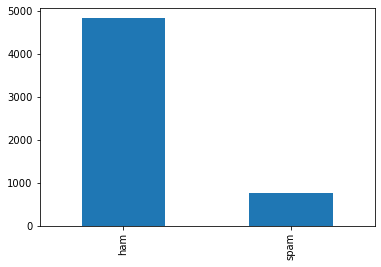

In [7]:
#Checking counts of Ham and spam
df['v1'].value_counts().plot(kind='bar')

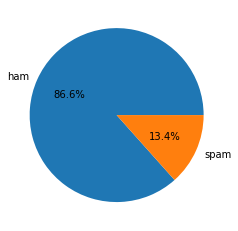

In [8]:
import matplotlib.pyplot as plt
plt.pie(df["v1"].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

# Building the model

In [9]:
#separate x and y
x=df.v2.values
y=df.v1.values

In [10]:
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [11]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

# split train and test

In [12]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25)

In [13]:
# Data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train= cv.fit_transform(xtrain)

In [14]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# ML ALgorithm

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model = MultinomialNB()
model.fit(X_train,ytrain)

MultinomialNB()

In [17]:
x_test=cv.transform(xtest)
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [19]:
type(ytrain)

numpy.ndarray

In [20]:
X_train

<4179x7515 sparse matrix of type '<class 'numpy.int64'>'
	with 55671 stored elements in Compressed Sparse Row format>

In [21]:
model.score(x_test, ytest)

0.9913854989231874

In [22]:
email=['get an iphone 14 for free','use this product to be fair within 7 days, otherwise money return', 'give your account number of bank ,to get 1000000 dollar free','i am looking for english language tutorials']
email

['get an iphone 14 for free',
 'use this product to be fair within 7 days, otherwise money return',
 'give your account number of bank ,to get 1000000 dollar free',
 'i am looking for english language tutorials']

In [23]:
cv_email= cv.transform(email)
cv_email

<4x7515 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [24]:
model.predict(cv_email)

array(['spam', 'ham', 'ham', 'ham'], dtype='<U4')

# Thank You!!!